# 🗂️ Visualizar imagen de MapBiomas Colombia

## 🧪 Requisitos para usar GEE en JupyterLab desde Docker

### 1. Instalar librerías necesarias dentro del contenedor

En una celda de Jupyter o desde la terminal del contenedor, es necesario ejecutar:

```bash
conda install conda-forge::earthengine-api
conda install conda-forge::geemap
conda install conda-forge::ipyleaflet
```

## 🔐 Autenticación en Google Earth Engine
Desde el notebook, ejecuta el siguiente código para autenticar tu cuenta de Google Earth Engine:

import ee

# Solo es necesario la primera vez
ee.Authenticate()
ee.Initialize()
Esto abrirá un enlace en tu navegador donde deberás iniciar sesión con tu cuenta de Google asociada a Earth Engine. Luego, copia el código de verificación que te aparece y pégalo en el campo solicitado del notebook.

✅ Este paso solo es necesario una vez por entorno. Si cierras el contenedor o cambias de entorno, puede que debas volver a autenticarte.

In [1]:
import sys
sys.path.append("../src")
import visualization_tools
visualization_tools.authenticate_earth_engine()

✅Auteticación y conexión con Google Earth Engine exitosa


### 📥 Cargar el asset

Una vez autenticada tu cuenta y con las librerías instaladas, puedes cargar el asset de MapBiomas Colombia y visualizarlo en un mapa interactivo.

El asset corresponde a una imagen multibanda, donde cada banda representa la cobertura para un año (por ejemplo: `classification_1985`, `classification_2022`, etc.).

```python
# Cargar el asset como imagen de Earth Engine
imagen = ee.Image("projects/mapbiomas-public/assets/colombia/collection2/mapbiomas_colombia_collection2_integration_v1")


In [2]:
# Aqui podrás visualizar las bandas que contiene la imágen de cobertura y uso de MapBiomas Colombia
imagen = visualization_tools.load_mapbiomas_asset()
print (imagen.bandNames().getInfo())

['classification_1985', 'classification_1986', 'classification_1987', 'classification_1988', 'classification_1989', 'classification_1990', 'classification_1991', 'classification_1992', 'classification_1993', 'classification_1994', 'classification_1995', 'classification_1996', 'classification_1997', 'classification_1998', 'classification_1999', 'classification_2000', 'classification_2001', 'classification_2002', 'classification_2003', 'classification_2004', 'classification_2005', 'classification_2006', 'classification_2007', 'classification_2008', 'classification_2009', 'classification_2010', 'classification_2011', 'classification_2012', 'classification_2013', 'classification_2014', 'classification_2015', 'classification_2016', 'classification_2017', 'classification_2018', 'classification_2019', 'classification_2020', 'classification_2021', 'classification_2022', 'classification_2023']


#### 🎨 Definir la paleta de colores usada por MapBiomas Colombia

Se incluyó la paleta de colores definida por el proyecto MapBiomas Colombia

In [13]:
palette = visualization_tools.define_palette()
print(palette)

['#ffffff', '#ffffff', '#ffffff', '#1f8b49', '#ffffff', '#04381D', '#026975', '#ffffff', '#ffffff', '#4a7509', '#ffffff', '#519799', '#D6BC74', '#d98c5c', '#ffffff', '#db6b74', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffefc3', '#ffffff', '#ffa07a', '#d44d1e', '#b4b4b4', '#ffffff', '#ffffff', '#ffffff', '#c9c9c9', '#9c0027', '#ff9900', '#fcf1a4', '#2532e4', '#b3c6ff', '#f4cccc', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#006d59', '#ad5100', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#E97A7A']


# 🗺️ Visualizar el mapa interactivo

Esta sección permite explorar visualmente la cobertura y uso del suelo en el departamento seleccionado para un año específico dentro del rango disponible (1985 a 2022).

La visualización se realiza mediante un mapa interactivo, facilitando la inspección espacial de los cambios y la distribución de las coberturas en el territorio.

🔧 Instrucciones
Para visualizar un año específico:

Dirígete al bloque de código que contiene la función de visualización y modifica el parámetro del año dentro de la función

In [14]:
map = visualization_tools.visualize_mapbiomas(imagen, palette, "2021")

map

Map(center=[3.5, -72], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

# 🗺️ Visualización de capas de referencia.

Este módulo permite visualizar capas geográficas recortadas al departamento de interes. La visualización se realiza con `matplotlib` y se complementa con un mapa base proporcionado por `contextily`.


In [15]:
ruta = r"/notebooks/DEFORESTACION/results/CAPAS_DPTO" 
print(visualization_tools.visualizacion_rutas(ruta))

['dpto_4326.gpkg', 'parques_dpto_4326.gpkg', 'resguardos_dpto_4326.gpkg']


In [16]:
dpto_4326, resguardos_dpto_4326, parques_dpto_4326 = visualization_tools.load_geospatial_layers(ruta)

Departamentos: (1, 8)
Resguardos: (54, 22)
Áreas protegidas: (99, 31)


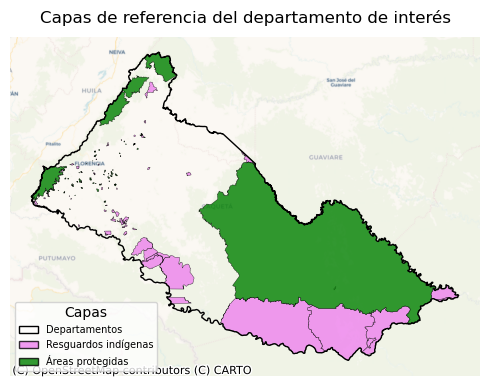

In [17]:
visualization_tools.visualize_geospatial_layers(dpto_4326, resguardos_dpto_4326, parques_dpto_4326)

# 🗺️ Visualización de las coberturas en el departamento seleccionado

Este módulo permite visualizar  las coberturas recortadas al departamento de interes y año de interes, para ello dirígete al bloque de código que contiene la función de visualización y modifica el parámetro del año dentro de la función.

In [18]:
cober_clipped, dpto_geom = visualization_tools.clip_raster_to_region(dpto_4326)
map = visualization_tools.visualizacion_raster_dep(palette,dpto_geom,cober_clipped,"2019")

map

✅ Capas  convertidas correctamente en:


Map(center=[0.8295979759918997, -73.96631873639063], controls=(WidgetControl(options=['position', 'transparent…

# 🗺️ Visualizar la reclasificación

Esta función permite cargar y visualizar una o varias bandas del raster reclasificado en tres clases principales:

🟢 1 = Bosque

🟡 2 = Cobertura natural no forestal

🔴 3 = Uso antrópico

Antes de visualizar, es necesario establecer dos parámetros clave:

- anio inicial: año correspondiente al primer raster (por ejemplo, 1985).

- anios: años que se deseen visualizar.

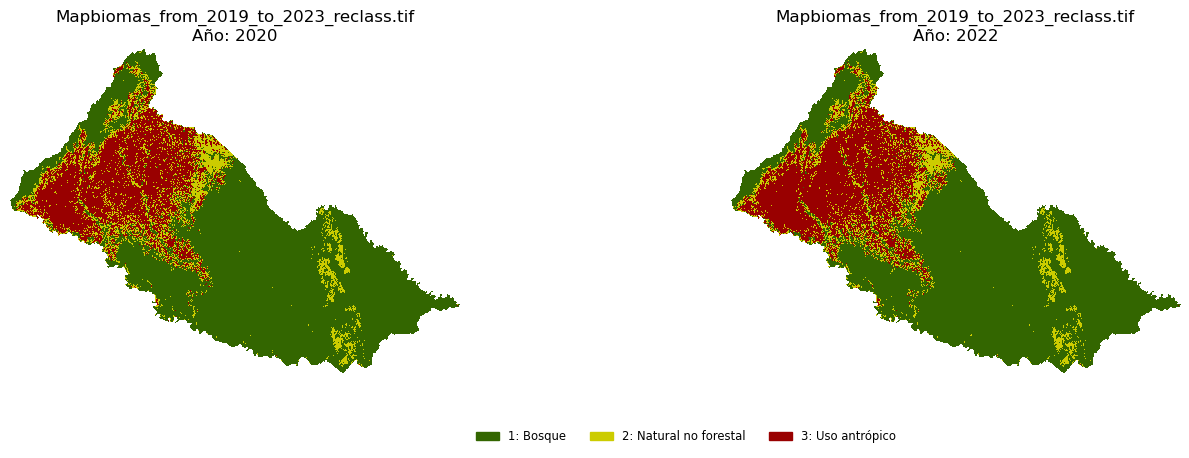

In [4]:
# Definir ruta local
root_folder = "/notebooks"
ruta_salida = root_folder + "/DEFORESTACION/results/RECLASS/Mapbiomas_from_2019_to_2023_reclass.tif"

visualization_tools.visualizar_reclass(ruta_salida, anios=[2020,2022], anio_inicial=2019)

# 🌱 Visualización de transiciones de cobertura y uso del suelo

Este paso permite visualizar de forma clara y colorida los cambios ocurridos entre dos años consecutivos.

Cada valor en la imagen de transición representa un tipo de cambio, y se muestra en un color distinto:

- 0 = Sin cambios
- 1 = Deforestación
- 2 = Regeneracion
- 3 = Degradación
- 4 = Otros

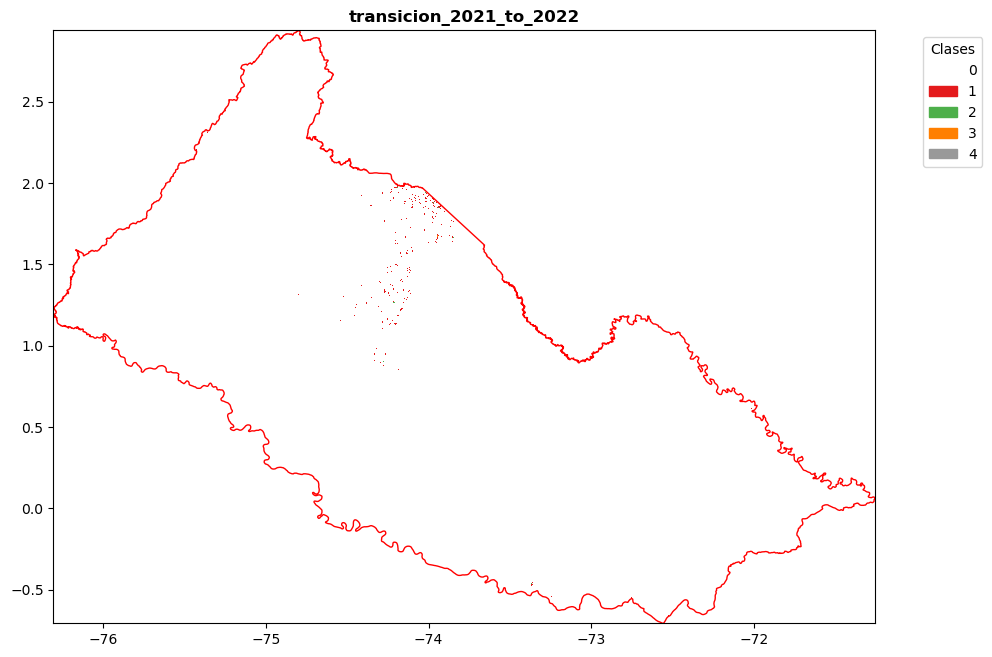

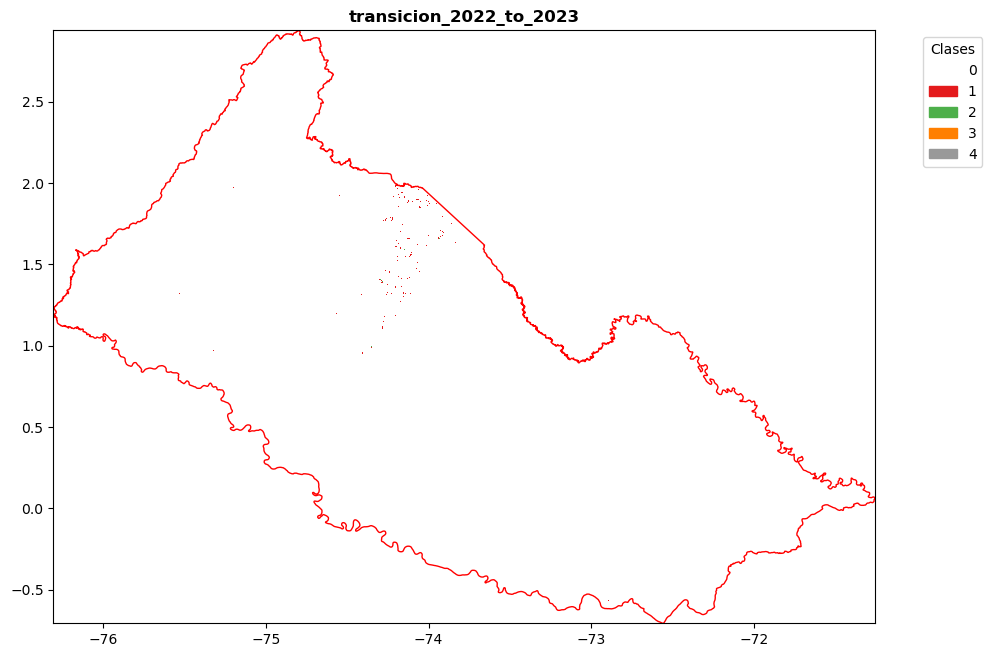

In [6]:
# Definir ruta local
root_folder = "/notebooks"
carpeta_tifs = root_folder + "/DEFORESTACION/results/TRANSICIONES"
dpto = root_folder + "/DEFORESTACION/results/CAPAS_DPTO/dpto_4326.gpkg"

visualization_tools.visualizar_transiciones(carpeta_tifs,anio_desde=2022,anio_hasta=2023,ruta_shapefile_departamento=dpto)

# 📊 Estadisticas_transiciones
Esta función procesa una serie de rásteres de transiciones anuales que contienen clases de cambio (deforestación, regeneración y degradación). Calcula el área anual por clase, exporta los resultados a un archivo CSV y genera un gráfico con la evolución temporal.

#### Parámetros

- `carpeta_tifs`: Ruta donde se encuentran los archivos `.tif` con las transiciones anuales.
- `carpeta_destino`: Carpeta donde se guardarán el gráfico PNG y el archivo CSV.

#### Salida

- Un gráfico PNG llamado `grafico_transiciones.png` con la evolución de áreas por clase a lo largo de los años.
- Un archivo CSV llamado `resumen_transiciones.csv` con el área total (en hectáreas) por clase y por año.
- También imprime las rutas de los archivos exportados.

#### Clases evaluadas

- `1`: Deforestación  
- `2`: Regeneración  
- `3`: Degradación

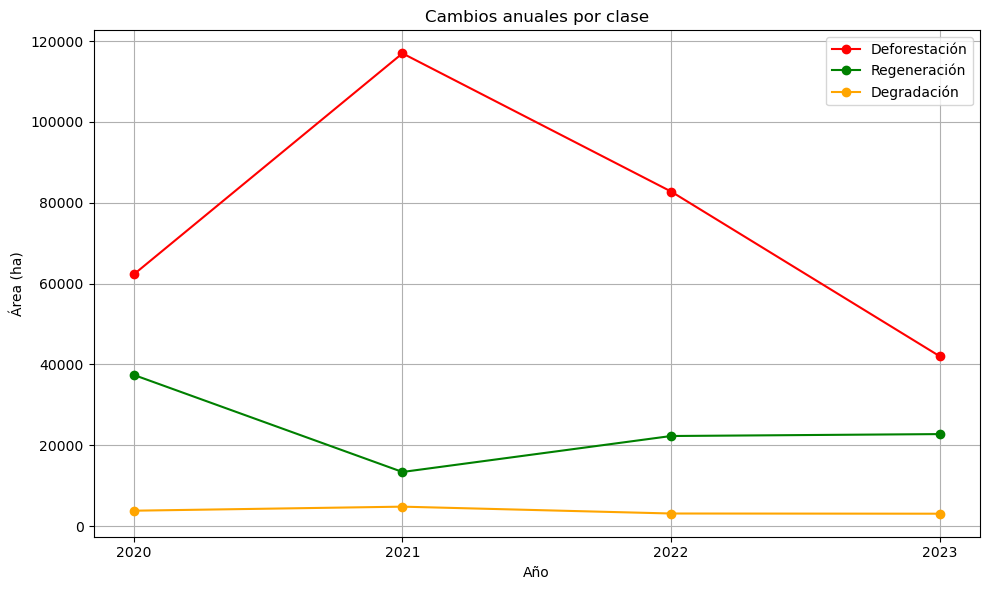

✅ CSV guardado en: /notebooks/DEFORESTACION/results/STATS/resumen_transiciones.csv
✅ Gráfico guardado en: /notebooks/DEFORESTACION/results/STATS/grafico_transiciones.png


In [2]:
# Definir ruta local
root_folder = "/notebooks"
carpeta_tifs = root_folder + "/DEFORESTACION/results/TRANSICIONES"
carpeta_destino = root_folder + "/DEFORESTACION/results/STATS"

visualization_tools.analizar_transiciones_y_exportar(carpeta_tifs, carpeta_destino)

## 📊 Estadísticas en áreas protegidas
Esta función analiza un raster de transiciones de cobertura (deforestación, regeneración y degradación) para un año específico, dentro de áreas protegidas (PNN y resguardos), y genera gráficas con los 10 polígonos con mayor área afectada por tipo de transición.

#### Parámetros

- `carpeta_tifs`: Ruta a la carpeta donde están los archivos `.tif` de transiciones anuales.
- `anio`: Año de análisis. Se buscará un archivo llamado `transicion_{anio-1}_to_{anio}.tif`.
- `gdf_pnn`: GeoDataFrame de parques nacionales naturales.
- `gdf_resguardos`: GeoDataFrame de resguardos indígenas.
- `carpeta_exportacion`: Ruta donde se guardarán las gráficas generadas.

#### Salida

- Muestra 6 gráficas (3 clases x 2 tipos de área protegida) con las 10 áreas más afectadas por tipo.
- Exporta las gráficas como imágenes PNG.
- Retorna un DataFrame con los valores de área (en hectáreas) por clase, año, tipo de área protegida y nombre.

#### Clases evaluadas

- `1`: Deforestación  
- `2`: Regeneración  
- `3`: Degradación

✅ CSV guardado en: /notebooks/DEFORESTACION/results/STATS/transiciones_2023.csv
✅ Gráfica guardada en: /notebooks/DEFORESTACION/results/STATS/PNN_Deforestación_2023.png
✅ Gráfica guardada en: /notebooks/DEFORESTACION/results/STATS/PNN_Regeneración_2023.png
✅ Gráfica guardada en: /notebooks/DEFORESTACION/results/STATS/PNN_Degradación_2023.png
✅ Gráfica guardada en: /notebooks/DEFORESTACION/results/STATS/Resguardos_Deforestación_2023.png
✅ Gráfica guardada en: /notebooks/DEFORESTACION/results/STATS/Resguardos_Regeneración_2023.png
✅ Gráfica guardada en: /notebooks/DEFORESTACION/results/STATS/Resguardos_Degradación_2023.png


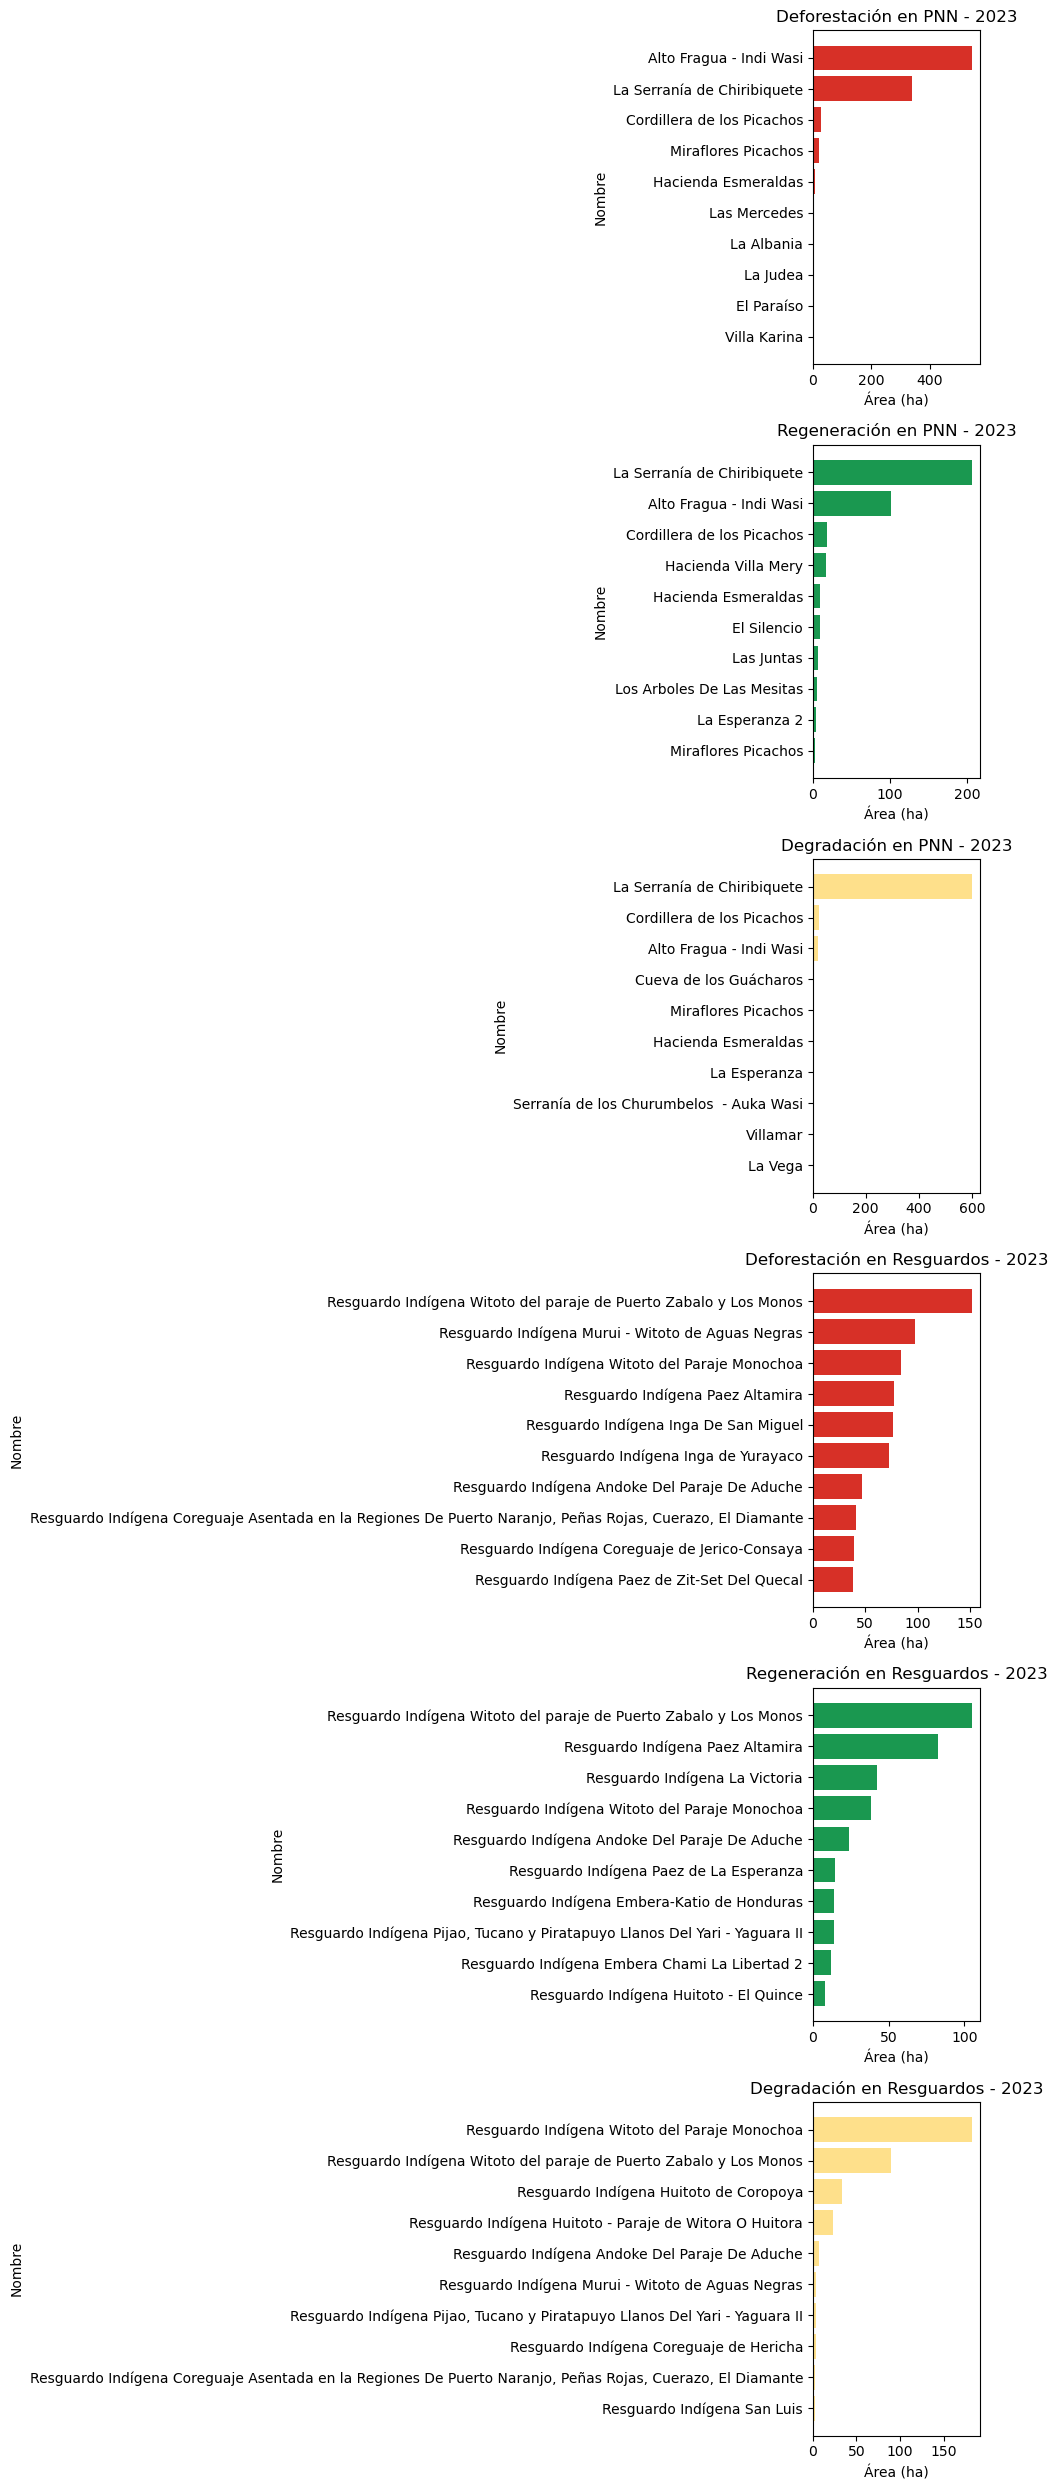

In [2]:
import geopandas as gpd
carpeta_tifs = "/notebooks/DEFORESTACION/results/TRANSICIONES"
gdf_pnn = gpd.read_file("/notebooks/DEFORESTACION/results/CAPAS_DPTO/parques_dpto_4326.gpkg")
gdf_resguardos = gpd.read_file("/notebooks/DEFORESTACION/results/CAPAS_DPTO/resguardos_dpto_4326.gpkg")

df_resultados= visualization_tools.graficar_transiciones_por_area_protegida(carpeta_tifs,anio=2023,gdf_pnn=gdf_pnn,gdf_resguardos=gdf_resguardos)